# Zillow Project

## GOALS:

• To predict the property tax assessed values of Single Family Properties that had a transaction during 2017.

• Recommend on ways to make a better model.

• Find what states and counties are the properties located in.

## IMPORTS

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w
import explore as e
import modeling as m

from pydataset import data
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## AQUIRE

• Got the data from the Zillow database in MySQL.

• The dataset that was pulled initially had 52,442 rows and 8 different features, the dataset including property information and details about the properties.

• Each row in the dataset represents a single-family property with transactions in 2017.

• Each column in the dataset represents a specific feature of the property.

## PREPARE

• Prepared the data by applying a series of transformations, removing unnecessary columns, adding new columns as needed for further exploration, and renaming some columns for clarity.

• Also performed some data cleaning steps to ensure the dataset's quality. Specifically, I dropped any nulls, checked for missing values and duplicates, and removed outliers from bathrooms, yearbuilt, area, and property_value.

• To make the dataset more consistent, I changed features from float to int, encoded the county feature, and rearranged the columns.

• Once all this was done, we were left with only 47,347 rows, so 5,095 rows were removed. 

• For further exploration, a data frame prepared CSV file was also created.


In [2]:
df, prep_df = w.get_zillow_data()

csv file found and loaded


In [3]:
df.shape

(47347, 8)

## Data Dictionary

| Features | Definition |
| --- | --- |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms |
| area | Area of the house in square footage |
| yearbuilt | The year the property was built |
| county | The county were the properies are located |
| county_Orange | Orange county - where the property is located |
| county_Ventura | Ventura county - where the property is located |
| property_value | property tax assessed value in dollars |

In [4]:
target = 'property_value'

In [5]:
tr, val, ts = w.get_split(df)

In [6]:
tr.shape, val.shape, ts.shape

((28407, 8), (9470, 8), (9470, 8))

In [7]:
# no data sample was used at the end
tr_smpl = tr

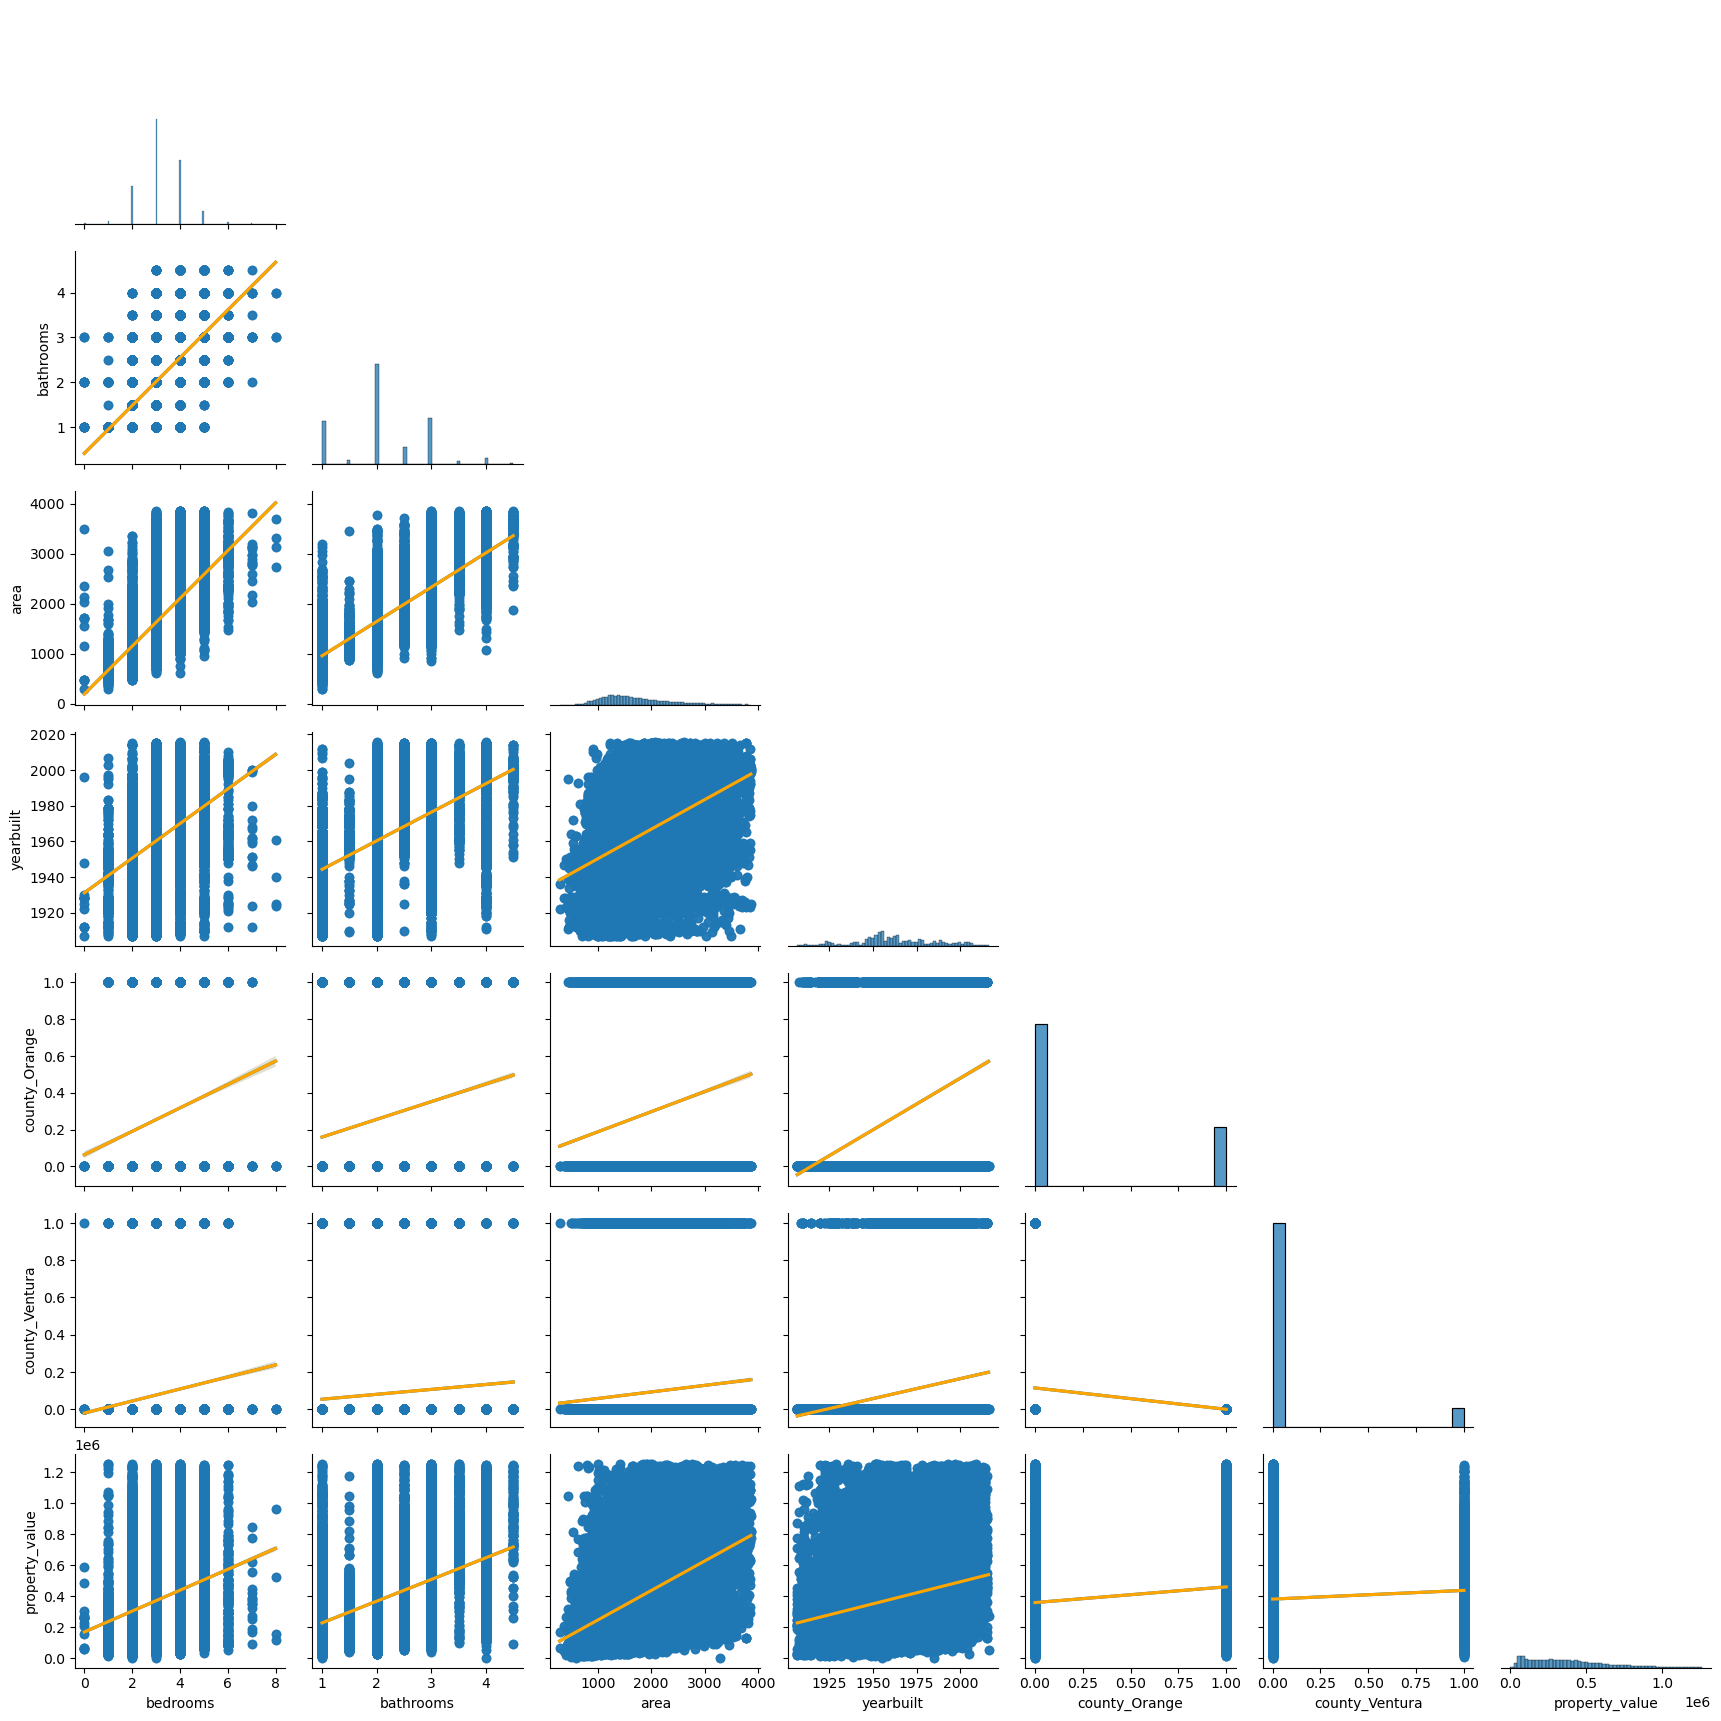

In [8]:
e.plot_variable_pairs(tr_smpl)

## 1. Does the location of a property impact its property value?

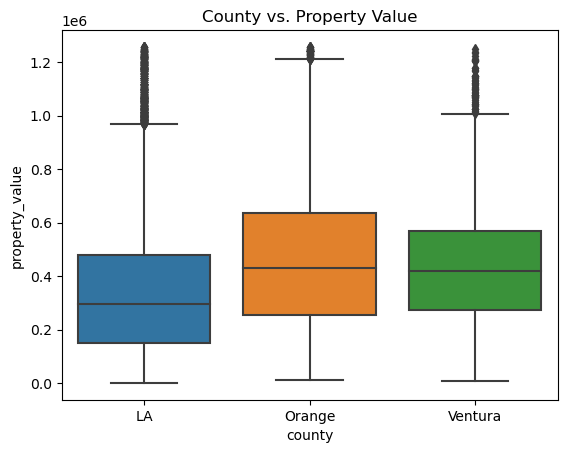

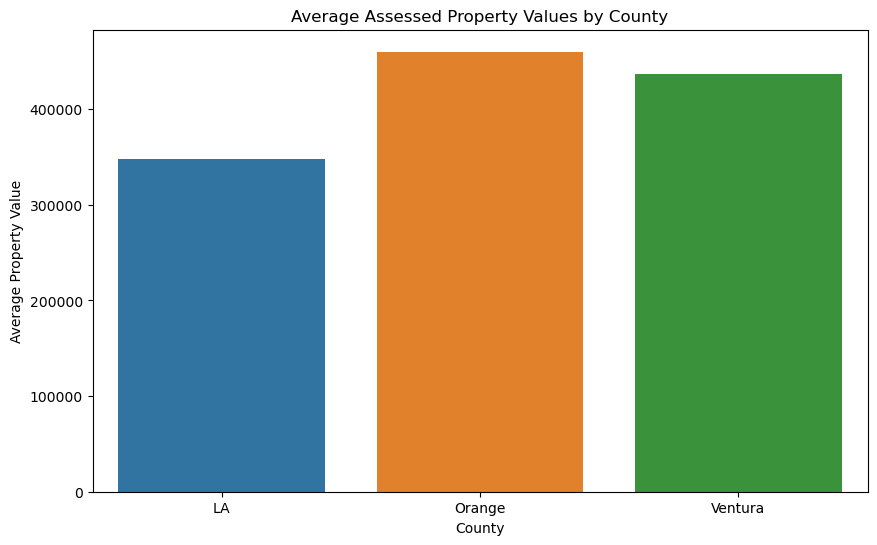

In [9]:
e.get_qone_chart(tr_smpl)

Hypothesis Test:
>Null Hypothesis (H0): The location of a property does not have a significant impact on its property value.

>Alternative Hypothesis (HA): The location of a property has a significant impact on its property value.

In [25]:
# Perform Kruskal-Wallis test
e.get_anova_n_kruskal_test(tr_smpl)

Kruskal-Wallis - p-value: 5.330446174857006e-271
We reject the null hypothesis


### Summary:

The location property value matters of where you choose to live. Orange county has the highest property value and LA the lowest. 

## 2. How does the square footage of a property relate to its property value?

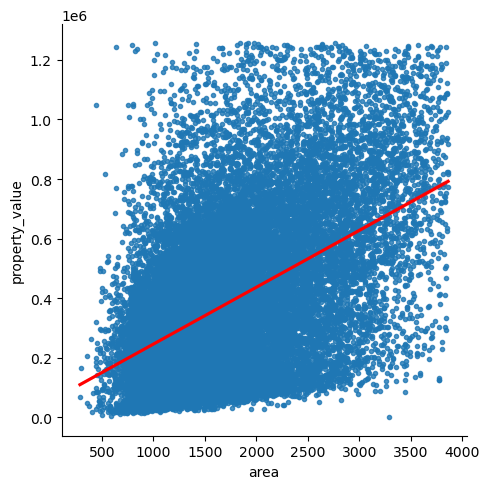

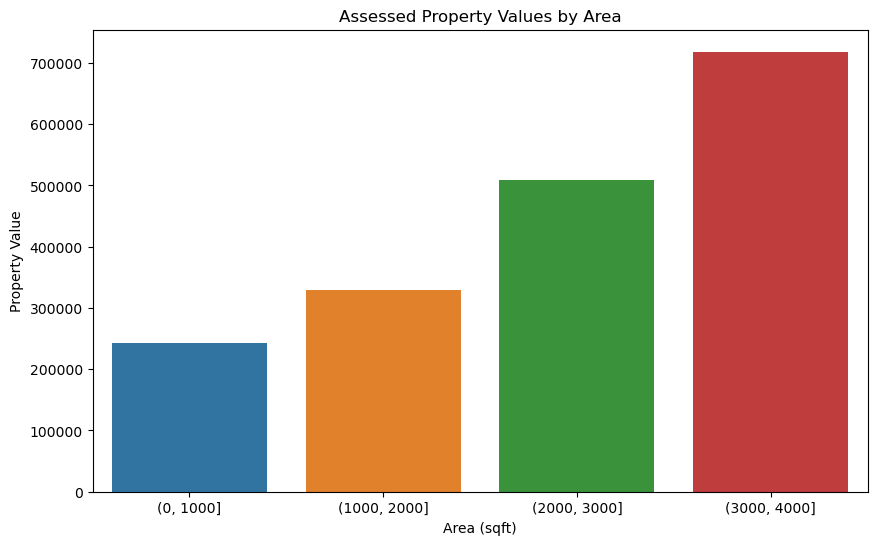

In [11]:
e.get_qtwo_chart(tr_smpl)

>Null Hypothesis (H0): There is NO significant correlation between the square footage of a property and its property value.

>Alternative Hypothesis (HA): There IS a significant correlation between the square footage of a property and its property value.

In [12]:
e.get_qtwo_stats(tr_smpl)

Pearson correlation - p-value: 0.0
We reject the null hypothesis

Correlation between area and property value
  r = 0.4802


### Summary:

There is a significant difference between the area of a property and the value. 

## 3. Is the relationship between the number of bedrooms/bathrooms and the property value?

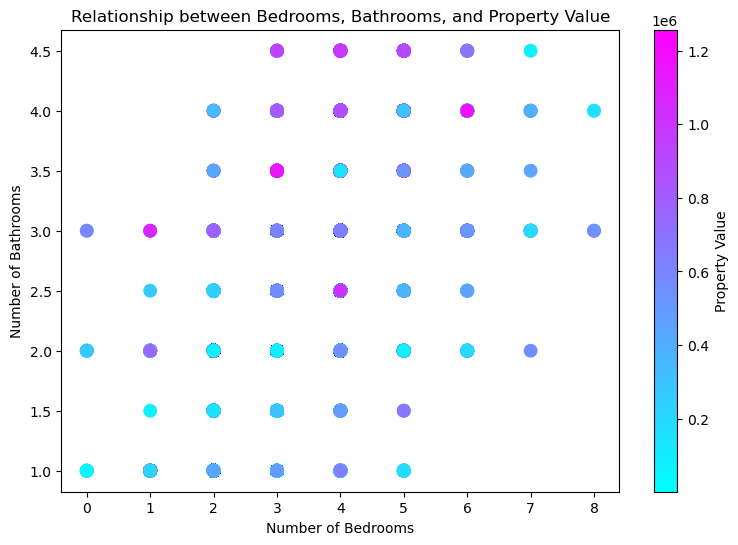

In [13]:
e.get_qthree_chart(tr_smpl)

>Null Hypothesis (H0): There is NO relationship between the number of bedrooms/bathrooms and the property value.

>Alternative Hypothesis (HA): There is a relationship between the number of bedrooms/bathrooms and the property value.

In [14]:
e.get_qthree_stats(tr_smpl)


ANOVA - p-value: 0.0
We reject the null hypothesis



,bedrooms,bathrooms,property_value
bedrooms,1.000000,0.602067,0.221779
bathrooms,0.602067,1.000000,0.408730
property_value,0.221779,0.408730,1.000000


### Summary:

Properties with a higher number of bedrooms or bathrooms have a significantly different property value compared to properties with fewer bedrooms or bathrooms.

### 4. Does the year built of a property affect its property value?

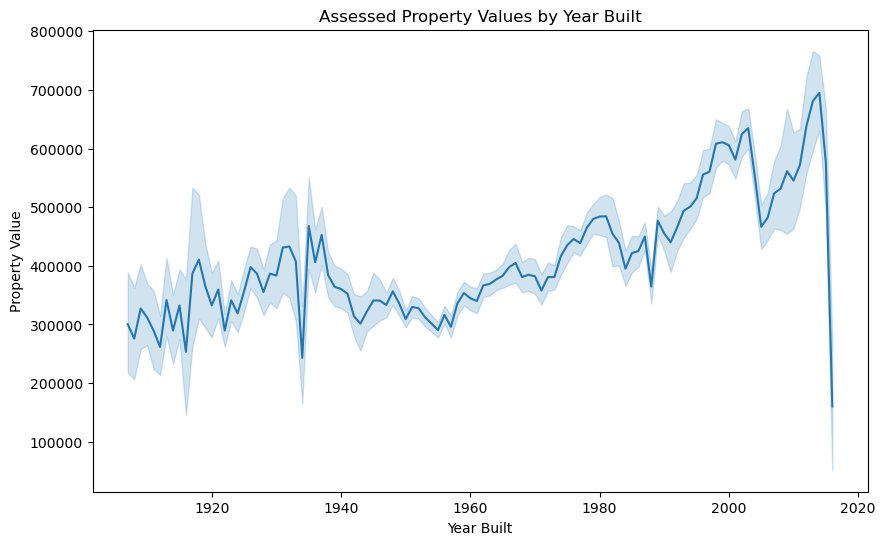

In [15]:
e.get_qfour_chart(tr_smpl)

>Null Hypothesis (H0): There is NOT a significant difference in the property values of newer and older properties.

>Alternative Hypothesis (HA): There IS a significant difference in the property values of newer and older properties.

In [16]:
e.get_qfour_stats(tr_smpl)


t-test - p-value: 0.0
We reject the null hypothesis



### Summary:

The age of a house has a significant impact on its value. Newer houses are becoming more expensive while older ones are decreasing in value.

## Features

Dropped - county

    Bedrooms
    Bathrooms
    Area
    Year built

## MODELING

In [17]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = m.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [18]:
X_tr_sc, X_val_sc, X_ts_sc = m.scale_data(X_tr,X_val,X_ts,to_scale)

In [19]:
metrics_df, pred_lr_rfe, pred_lr, pred_lars, pred_pr, pred_glm = m.get_models_dataframe(baseline,tr,y_tr,y_val,y_ts,X_tr_sc,X_val_sc,X_ts_sc)
metrics_df

,model,rmse val,r2 val
0,baseline,2.628774e+05,0.000000e+00
1,ols+RFE,2.293786e+05,2.432494e-01
2,ols,2.274820e+05,2.557116e-01
3,lars,2.274808e+05,2.557198e-01
4,poly_2D,2.227616e+05,2.862802e-01
5,poly_3D,2.239871e+05,2.784053e-01
6,poly_4D,2.216701e+05,2.932574e-01
7,poly_5D,2.224522e+05,2.882611e-01
8,poly_6D,2.452022e+05,1.352392e-01
9,poly_7D,5.004665e+05,-2.602444e+00


In [20]:
best_model = m.get_best_model(baseline, tr, y_tr, y_val, y_ts, X_tr_sc, X_val_sc, X_ts_sc)
best_model

,best model,rmse,r2
0,poly_4D,221670.069167,0.293257


In [21]:
result = m.test_best_model(best_model, X_ts_sc, y_ts, X_tr_sc, y_tr)
result

,model,rmse,r2
0,test,224946.655615,0.28798


### Conclusion

During the exploration, it was found that the property's location, the square footage, the number of bedrooms/bathrooms, and the year built impacted the property tax assessed value. It was also found that the properties were located in California in LA, Ventura, and Orange counties. 

In the modeling process, the Polynomial model with 4 degrees was the most effective model for predicting the property value.

### Recommendations for better models

Based on the findings, removing as many outliers as possible, testing several models and using algorithms to show the best models.

### Next Steps

The next steps include comparing the train RMSE vs the validate RMSE and further exploring other features. 